In [1]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data=pd.read_csv('cars_price.csv')

In [3]:
data.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
#check statistical info
data.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


# clean data 

In [4]:
# check null values in data det
data.isna().sum().values

array([   0,    0,    0,    0,    0,    0,    0,    0,   30,    0,    0,
       1345, 3755], dtype=int64)

In [5]:
# very few values are null. rather than replace these values with 0 or mean method we can drop it 
data.dropna(axis=0,inplace=True)

In [6]:
# drop unneccessary column from data frame and make copy it.
data1=data.drop(labels=['Unnamed: 0'],axis=1)

In [7]:
#checek duplicat values
data1.duplicated().sum()


45

In [8]:
# drop these 
data1.drop_duplicates(inplace=True)
data1

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...,...
39994,audi,a4,9700,2008,with mileage,278000.0,diesel,2000.0,blue,mechanics,front-wheel drive,D
39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D


In [9]:
#plot graph between dependent and independent variables 

<Figure size 842.4x626.4 with 0 Axes>

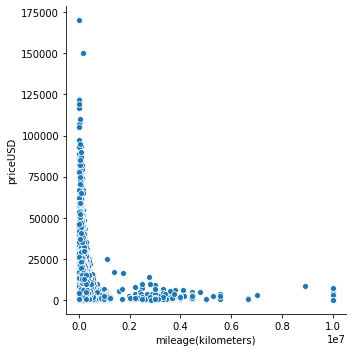

In [10]:
#Graph price vs mileage 
plt.figure(figsize=(11.7,8.7))
sns.relplot(x='mileage(kilometers)',y='priceUSD',sizes=(15,200),data=data1)

Text(0.5, 0, 'Make')

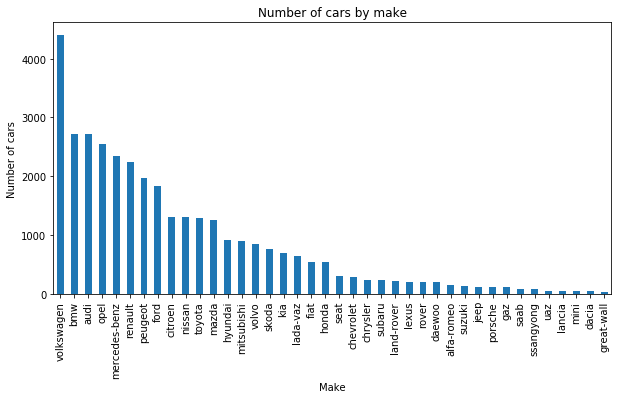

In [12]:
# Plotting a Histogram
data1.make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [13]:
#highest number of cars are volkswegan

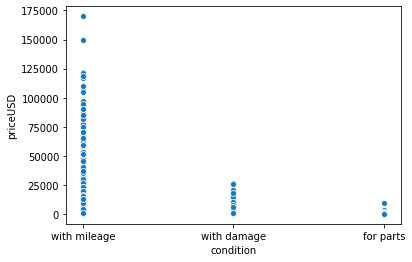

In [14]:
#2 price vs condition
sns.scatterplot(data1['condition'],data1['priceUSD'])

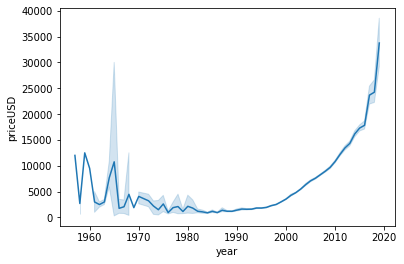

In [15]:
#year vs priceUSD
sns.lineplot(data1['year'],data1['priceUSD'])

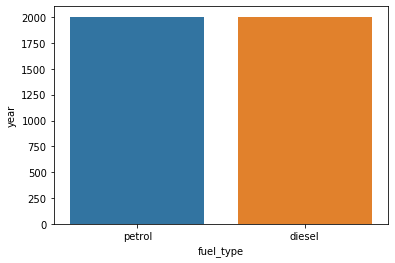

In [16]:
sns.barplot(data1['fuel_type'],data1['year'])

In [17]:
# plot data
def groupby(x1,x2):
    fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
    data1.groupby([x1,x2]).count()['priceUSD'].unstack().plot(ax=ax)

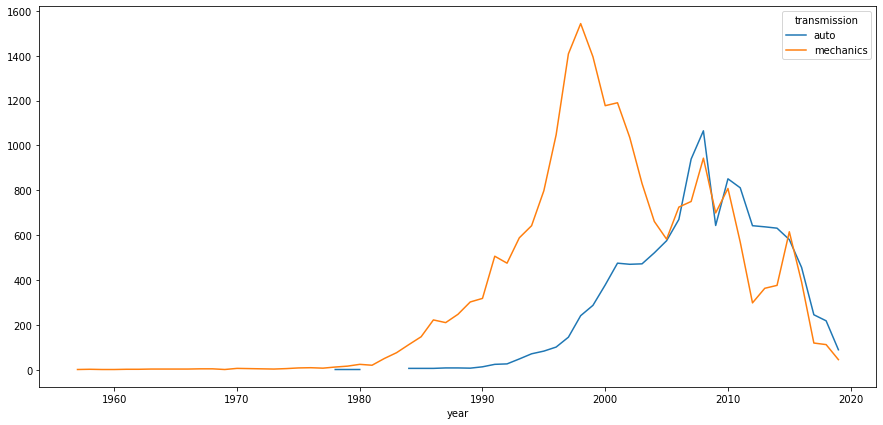

In [18]:
groupby('year','transmission')

In [19]:
#here we can see mechanic cars are rapidly grow in between 1990 to 2000 and after 2000 to 2010 its fall down but its more than auto.
#where auto cars are grow (less than mechanics)in middle of 1990 to 2010.But 2010 to 2020 its decrease. After 2010 to 2020 auto cars are more than mechanics.

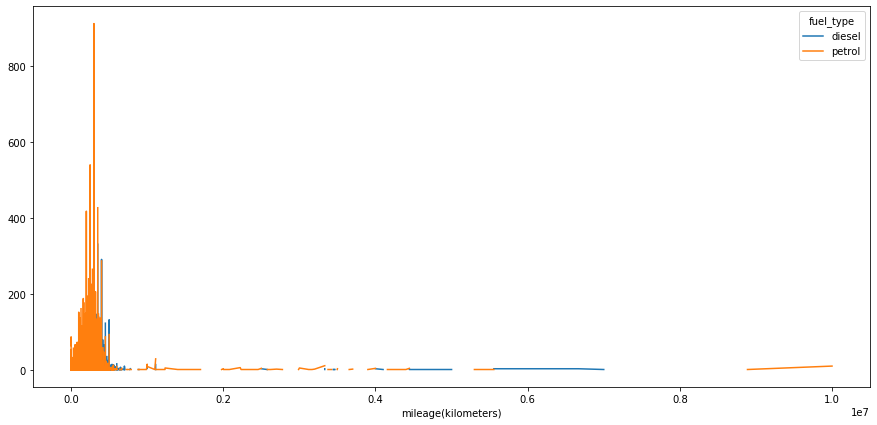

In [20]:
groupby('mileage(kilometers)','fuel_type')

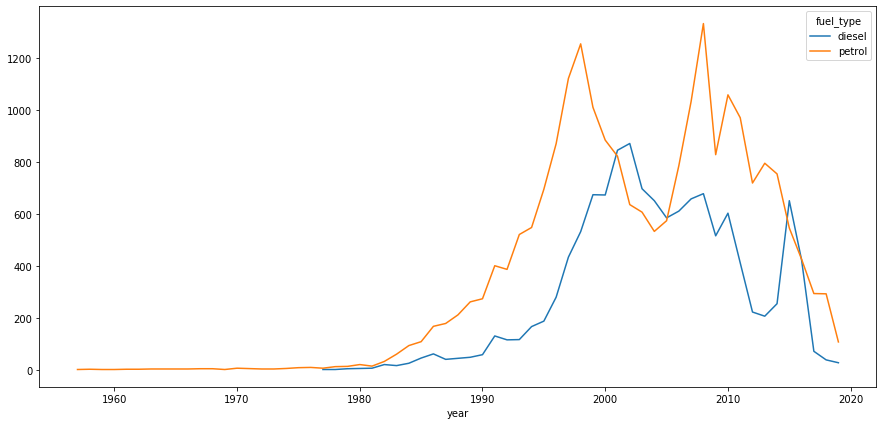

In [21]:
groupby('year','fuel_type')

In [22]:
#convert categorical data into numeric 

In [11]:
data1['fuel_type'].replace(to_replace=['petrol','diesel'],value=[0,1],inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data1["make"] = lb_make.fit_transform(data1["make"])


In [13]:
data['condition'].value_counts()

with mileage    34493
with damage       264
for parts         259
Name: condition, dtype: int64

In [14]:
#You can see here "with mileage" car has more than other. We can use if else situation where with mileage 
#has 1 and other car has 0 value
data1["condition_code"] = np.where(data1["condition"].str.contains("with mileage"),1,0)


In [15]:
data1['drive_unit'].value_counts()

front-wheel drive             24680
rear drive                     4355
all-wheel drive                3817
part-time four-wheel drive     2119
Name: drive_unit, dtype: int64

In [16]:
data1['transmission'].value_counts()

mechanics    22518
auto         12453
Name: transmission, dtype: int64

In [17]:
data1['transmission'].replace(to_replace=['mechanics','auto'],value=[0,1],inplace=True)

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34971 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 34971 non-null  int32  
 1   model                34971 non-null  object 
 2   priceUSD             34971 non-null  int64  
 3   year                 34971 non-null  int64  
 4   condition            34971 non-null  object 
 5   mileage(kilometers)  34971 non-null  float64
 6   fuel_type            34971 non-null  int64  
 7   volume(cm3)          34971 non-null  float64
 8   color                34971 non-null  object 
 9   transmission         34971 non-null  int64  
 10  drive_unit           34971 non-null  object 
 11  segment              34971 non-null  object 
 12  condition_code       34971 non-null  int32  
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 3.5+ MB


In [18]:
X=data1.iloc[:,[3,5,6,7,9,12]]
Y=data1.iloc[:,[2]]

In [19]:
from sklearn.feature_selection import chi2

In [20]:
chi2(X,Y)

(array([7.99065949e+02, 1.12993119e+09, 2.48746987e+03, 2.12191977e+06,
        7.75719044e+03, 1.07561363e+02]),
 array([1.        , 0.        , 0.01044528, 0.        , 0.        ,
        1.        ]))

In [21]:
#now bases on study and servey we can do hit and trial, opt those variables which are important in car price prediction ""
df=data1.iloc[:,[0,2,3,5,6,7,9,12]]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34971 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 34971 non-null  int32  
 1   priceUSD             34971 non-null  int64  
 2   year                 34971 non-null  int64  
 3   mileage(kilometers)  34971 non-null  float64
 4   fuel_type            34971 non-null  int64  
 5   volume(cm3)          34971 non-null  float64
 6   transmission         34971 non-null  int64  
 7   condition_code       34971 non-null  int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 2.1 MB


In [25]:
df.corr()

,make,priceUSD,year,mileage(kilometers),fuel_type,volume(cm3),transmission,condition_code
make,1.000000,-0.027106,0.050315,-0.021257,0.054427,-0.143781,-0.128493,0.009320
priceUSD,-0.027106,1.000000,0.642890,-0.178958,0.113289,0.268801,0.466562,0.089209
year,0.050315,0.642890,1.000000,-0.245505,0.065797,0.028458,0.404404,0.115575
mileage(kilometers),-0.021257,-0.178958,-0.245505,1.000000,0.088416,0.019227,-0.105284,-0.030591
fuel_type,0.054427,0.113289,0.065797,0.088416,1.000000,0.062239,-0.086743,0.031204
volume(cm3),-0.143781,0.268801,0.028458,0.019227,0.062239,1.000000,0.339744,0.023284
transmission,-0.128493,0.466562,0.404404,-0.105284,-0.086743,0.339744,1.000000,0.052762
condition_code,0.009320,0.089209,0.115575,-0.030591,0.031204,0.023284,0.052762,1.000000


In [27]:
from sklearn.model_selection import train_test_split

In [57]:
# split data set into X and Y
X1=df.iloc[:,[2,4,5,6,7]]
#A=df.iloc[:,[2,3,4,6,7]]
Y1=df.iloc[:,1]
X1
#A

,year,fuel_type,volume(cm3),transmission,condition_code
0,1993,0,2000.0,0,1
1,2008,1,1400.0,0,1
2,2008,0,2500.0,1,1
3,2005,0,1200.0,0,1
4,2002,1,2200.0,0,0
...,...,...,...,...,...
39994,2008,1,2000.0,0,1
39995,2008,0,3700.0,1,1
39996,2001,0,2200.0,0,1
39997,1999,1,2200.0,0,1


In [43]:
chi2(X1,Y1)

(array([7.99065949e+02, 2.48746987e+03, 2.12191977e+06, 7.75719044e+03,
        1.07561363e+02]),
 array([1.        , 0.01044528, 0.        , 0.        , 1.        ]))

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1)

In [47]:
#x_train,x_test,y_train,y_test=train_test_split(A,Y1)

In [59]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(26228, 5) (26228,) (8743, 5) (8743,)


In [49]:
from sklearn.linear_model import Lasso,ridge_regression,ridge,LogisticRegression

In [50]:
#create function 
def models(model):
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    return score

In [60]:
lasso=Lasso()
models(lasso)

0.5059755198493133

In [52]:
#lr=LogisticRegression()
#models(lr)

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

In [54]:
model=ExtraTreesRegressor()

In [61]:
models(model)

0.8702879213019055

In [51]:
prediction=model.predict(x_test)

In [52]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1572.4052760825095
MSE: 9037081.415530952
RMSE: 3006.1738831163693


Text(0, 0.5, 'Predictions')

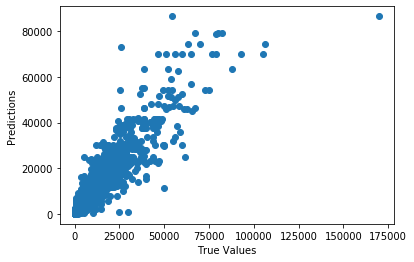

In [53]:
## The line / model
plt.scatter(y_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [59]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict # import KFold


In [56]:
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X1) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [60]:
scores = cross_val_score(model, X1, Y1, cv=10)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.87377103 0.86864422 0.82589823 0.86037218 0.82542651 0.80574807
 0.85925403 0.83019415 0.87921553 0.79282601]


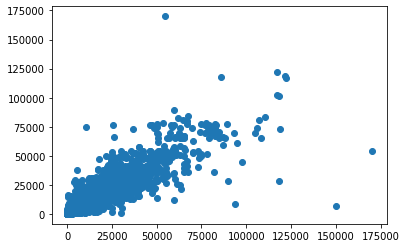

In [61]:
# Make cross validated predictions
predictions = cross_val_predict(model, X1, Y1, cv=6)
pre=pd.DataFrame(predictions)
plt.scatter(Y1, pre)

In [64]:
pickle.dump(model, open('models.pkl', 'wb'))